In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
ccpi = pd.read_csv("ccpi_2024.csv")

In [3]:
# Load the map of Europe. This includes countries' geometries.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

C:\Users\gusta\AppData\Local\Temp\ipykernel_25120\4056184098.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [4]:
map_ccpi = pd.merge(europe, ccpi, left_on="name", right_on='Country', how='left')

In [5]:
map_ccpi['CCPI_Reweighted_Score'] = \
        map_ccpi['2024_CCPI_Climate_Policy']*0.25 +\
        map_ccpi['2024_CCPI_Energy_Use']*0.25 +\
        map_ccpi['2024_CCPI_GHG']*0.25 +\
        map_ccpi['2024_CCPI_Renewables']*0.25

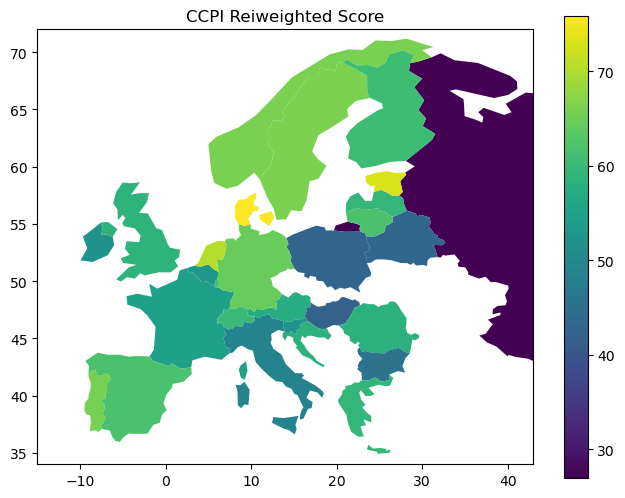

In [6]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
europe_chloropleth = map_ccpi.plot(column='CCPI_Reweighted_Score', ax=ax, legend=True)

# Change the focus so its only europe 
ax.set_xlim(-15, 43)  # Longitude limits
ax.set_ylim(34, 72)   # Latitude limits
plt.title("CCPI Reiweighted Score")

plt.show()

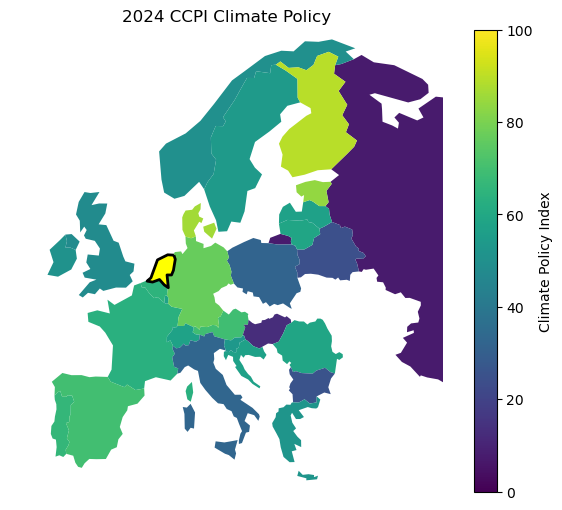

In [26]:
# Visualization for presentation
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the entire Europe chloropleth map
europe_chloropleth = map_ccpi.plot(
    column='2024_CCPI_Climate_Policy', 
    ax=ax, 
    legend=True, 
    vmin=0, vmax=100,
    legend_kwds={'label': "Climate Policy Index"}
)

# Highlight the Netherlands with a specific color; keep the outline as part of the highlight effect
netherlands = map_ccpi[map_ccpi['name'] == 'Netherlands']
netherlands.plot(ax=ax, color='yellow', edgecolor='black', linewidth=2)

# Adjust the view to focus on Europe
ax.set_xlim(-15, 43)  # Longitude limits
ax.set_ylim(34, 72)   # Latitude limits

# Remove plot border (spine) around the chloropleth map
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hide the x and y-axis
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

plt.title('2024 CCPI Climate Policy')

plt.show()

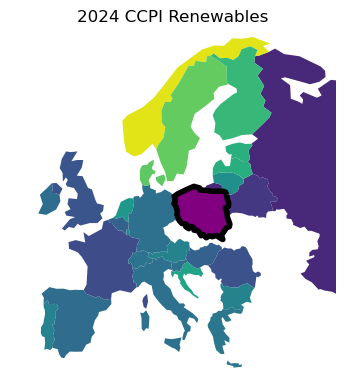

In [50]:
# Visualization for presentation
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))

# Plot the entire Europe chloropleth map
europe_chloropleth = map_ccpi.plot(
    column='2024_CCPI_Renewables', 
    ax=ax, 
    vmin=0, vmax=100
)

# Highlight the Netherlands with a specific color; keep the outline as part of the highlight effect
poland = map_ccpi[map_ccpi['name'] == 'Poland']
poland.plot(ax=ax, color='purple', edgecolor='black', linewidth=4)

# Adjust the view to focus on Europe
ax.set_xlim(-15, 43)  # Longitude limits
ax.set_ylim(34, 72)   # Latitude limits

# Remove plot border (spine) around the chloropleth map
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hide the x and y-axis
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

plt.title('2024 CCPI Renewables')

plt.show()

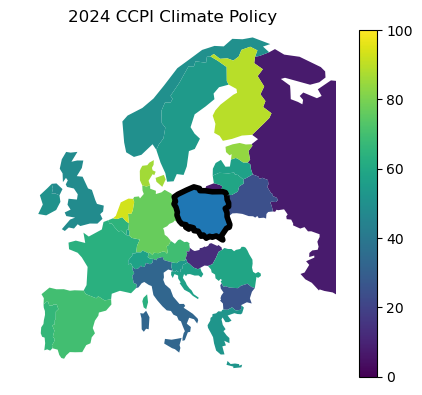

In [49]:
# Visualization for presentation
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))

# Plot the entire Europe chloropleth map
europe_chloropleth = map_ccpi.plot(
    column='2024_CCPI_Climate_Policy', 
    ax=ax, 
    legend=True, 
    vmin=0, vmax=100
)

# Highlight the Netherlands with a specific color; keep the outline as part of the highlight effect
poland = map_ccpi[map_ccpi['name'] == 'Poland']
poland.plot(ax=ax, edgecolor='black', linewidth=4)

# Adjust the view to focus on Europe
ax.set_xlim(-15, 43)  # Longitude limits
ax.set_ylim(34, 72)   # Latitude limits

# Remove plot border (spine) around the chloropleth map
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hide the x and y-axis
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

plt.title('2024 CCPI Climate Policy')

plt.show()

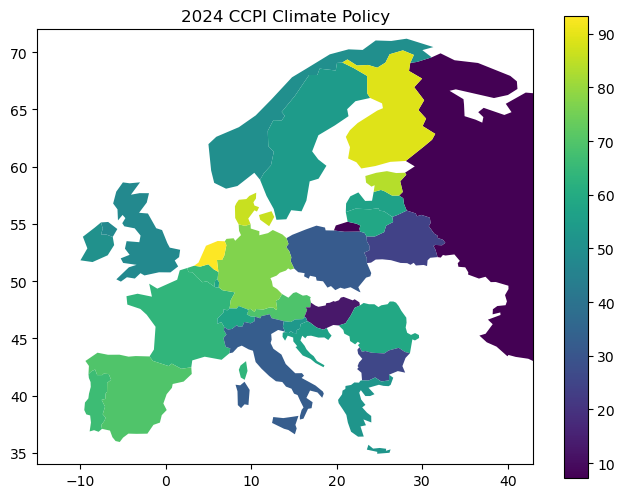

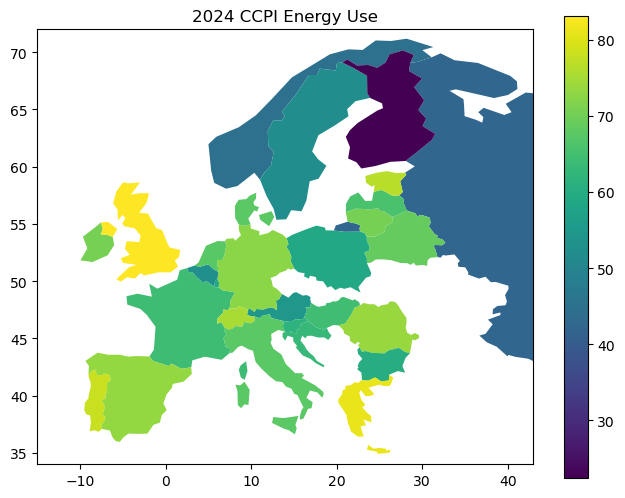

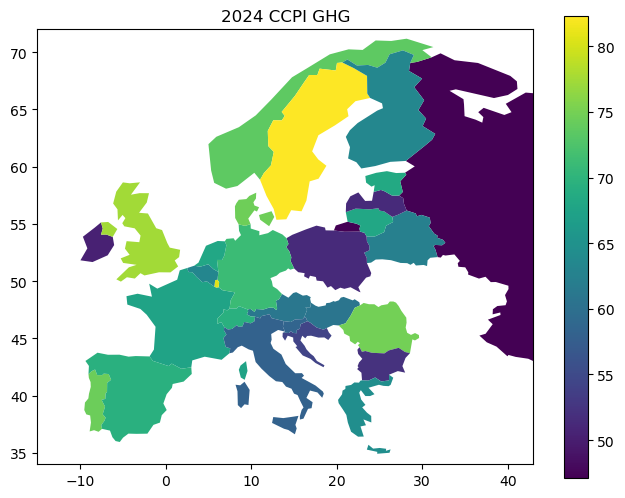

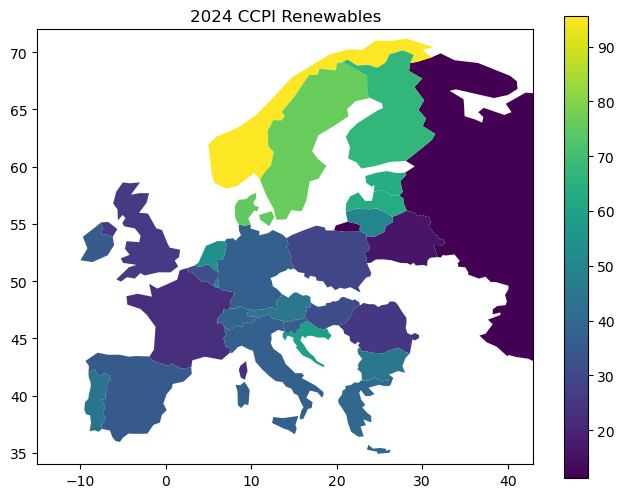

In [7]:
var_list = ['2024_CCPI_Climate_Policy', '2024_CCPI_Energy_Use', '2024_CCPI_GHG', '2024_CCPI_Renewables']

for var in var_list:
    # Plotting the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    europe_chloropleth = map_ccpi.plot(column=var, ax=ax, legend=True)

    # Change the focus so its only europe 
    ax.set_xlim(-15, 43)  # Longitude limits
    ax.set_ylim(34, 72)   # Latitude limits
    plt.title(var.replace("_", " "))

    plt.show()

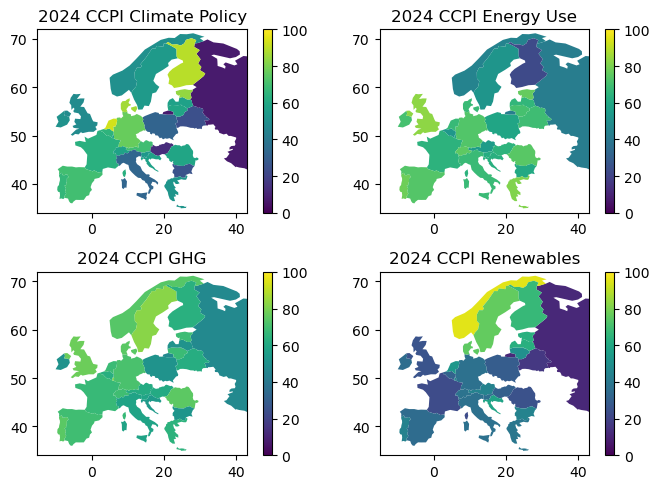

In [68]:
var_list = ['2024_CCPI_Climate_Policy', '2024_CCPI_Energy_Use', '2024_CCPI_GHG', '2024_CCPI_Renewables']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

for i, var in enumerate(var_list):
    # Plotting on the ith subplot
    europe_chloropleth = map_ccpi.plot(
        column=var, 
        ax=axes_flat[i], 
        legend=True, 
        vmin=0, vmax=100
    )
    axes_flat[i].set_xlim(-15, 43)  # Set longitude limits
    axes_flat[i].set_ylim(34, 72)   # Set latitude limits
    axes_flat[i].set_title(var.replace("_", " "))

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0, hspace=0.2)
plt.tight_layout()
